<a href="https://colab.research.google.com/github/umakrishna-2002/A-Deep-Learning-Approach-Integrating-Soil-and-Environmental-Factors-with-Feature-Scaling-Technique/blob/main/one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib
testfile = urllib.request.urlretrieve("https://raw.githubusercontent.com/mochiron-desu/kaggleJSON/main/kaggle.json", "kaggle.json")
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d atharvaingle/crop-recommendation-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
crop-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip crop-recommendation-dataset.zip

Archive:  crop-recommendation-dataset.zip
replace Crop_recommendation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import pickle as pk
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Crop_recommendation.csv')
df.dropna(inplace=True)

In [ ]:
print()
print('Shape of dataframe:')
print(str(df.shape))
print()
print('Head of dataframe:')
df.head()


Shape of dataframe:
(2200, 8)

Head of dataframe:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


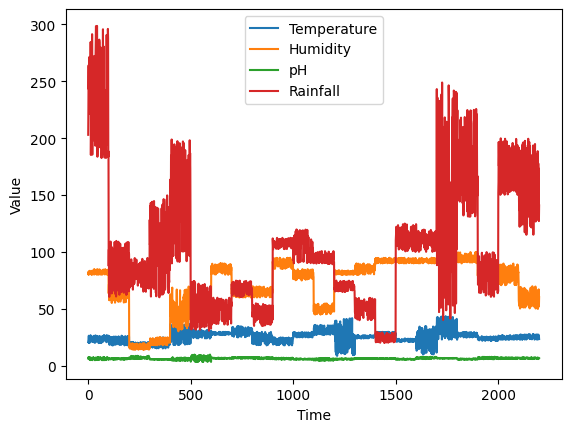

In [ ]:
# @title Environmental Factors over Time

import matplotlib.pyplot as plt
plt.plot(df['temperature'], label='Temperature')
plt.plot(df['humidity'], label='Humidity')
plt.plot(df['ph'], label='pH')
plt.plot(df['rainfall'], label='Rainfall')
plt.xlabel('Time')
plt.ylabel('Value')
_ = plt.legend()

In [ ]:
df['label'].value_counts()


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
encoder = OneHotEncoder()

encoded_Y = encoder.fit(y.values.reshape(-1,1))
encoded_Y = encoded_Y.transform(y.values.reshape(-1,1)).toarray()

encoded_Y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15
trainX, testX, trainY, testY = train_test_split(x, encoded_Y, test_size= 1 - train_ratio)
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
print(trainX.shape)
print(valX.shape)
print(testX.shape)

(1539, 7)
(330, 7)
(331, 7)


In [ ]:
re_transformed_array_trainY = encoder.inverse_transform(trainY)

unique_elements, counts_elements = np.unique(re_transformed_array_trainY, return_counts=True)
unique_elements_and_counts_trainY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_trainY.columns = ['unique_elements', 'count']

unique_elements_and_counts_trainY

,unique_elements,count
0,apple,64
1,banana,70
2,blackgram,74
3,chickpea,70
4,coconut,77
5,coffee,64
6,cotton,75
7,grapes,78
8,jute,62
9,kidneybeans,71


In [ ]:
re_transformed_array_valY = encoder.inverse_transform(valY)

unique_elements, counts_elements = np.unique(re_transformed_array_valY, return_counts=True)
unique_elements_and_counts_valY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_valY.columns = ['unique_elements', 'count']

unique_elements_and_counts_valY


,unique_elements,count
0,apple,21
1,banana,13
2,blackgram,14
3,chickpea,15
4,coconut,10
5,coffee,18
6,cotton,14
7,grapes,9
8,jute,18
9,kidneybeans,13


In [ ]:
re_transformed_array_testY = encoder.inverse_transform(testY)

unique_elements, counts_elements = np.unique(re_transformed_array_testY, return_counts=True)
unique_elements_and_counts_testY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_testY.columns = ['unique_elements', 'count']

unique_elements_and_counts_testY


,unique_elements,count
0,apple,15
1,banana,17
2,blackgram,12
3,chickpea,15
4,coconut,13
5,coffee,18
6,cotton,11
7,grapes,13
8,jute,20
9,kidneybeans,16


In [ ]:
y_part = [trainY, valY, testY]

for y_part in y_part:
    re_transformed_array = encoder.inverse_transform(y_part)

    unique_elements, counts_elements = np.unique(re_transformed_array, return_counts=True)
    unique_elements_and_counts = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
    unique_elements_and_counts.columns = ['unique_elements', 'count']
    print('---------------')
    print(unique_elements_and_counts)

---------------
   unique_elements count
0            apple    64
1           banana    70
2        blackgram    74
3         chickpea    70
4          coconut    77
5           coffee    64
6           cotton    75
7           grapes    78
8             jute    62
9      kidneybeans    71
10          lentil    73
11           maize    78
12           mango    66
13       mothbeans    63
14        mungbean    63
15       muskmelon    72
16          orange    70
17          papaya    69
18      pigeonpeas    68
19     pomegranate    76
20            rice    70
21      watermelon    66
---------------
   unique_elements count
0            apple    21
1           banana    13
2        blackgram    14
3         chickpea    15
4          coconut    10
5           coffee    18
6           cotton    14
7           grapes     9
8             jute    18
9      kidneybeans    13
10          lentil    11
11           maize    13
12           mango    18
13       mothbeans    17
14        mungbean

In [ ]:
list_trainY = unique_elements_and_counts_trainY['unique_elements'].to_list()
list_valY = unique_elements_and_counts_valY['unique_elements'].to_list()
list_testY = unique_elements_and_counts_testY['unique_elements'].to_list()

print(list_trainY)
print(list_valY)
print(list_testY)

['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']
['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']
['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


In [ ]:
check_val =  all(item in list_valY for item in list_trainY)

if check_val is True:
    print('OK !')
    print("The list_valY contains all elements of the list_trainY.")
else :
    print()
    print('No !')
    print("List_valY doesn't have all elements of the list_trainY.")

OK !
The list_valY contains all elements of the list_trainY.


In [ ]:
check_test =  all(item in list_testY for item in list_trainY)

if check_test is True:
    print('OK !')
    print("The list_testY contains all elements of the list_trainY.")
else :
    print()
    print('No !')
    print("List_testY doesn't have all elements of the list_trainY.")

OK !
The list_testY contains all elements of the list_trainY.


In [ ]:
checkpoint_no = 'checkpointt_1_ANN'
model_name = 'Crop_ANN'

In [ ]:
input_shape = trainX.shape[1]

n_batch_size = 64

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 200

num_classes = trainY.shape[1]

print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))

Input Shape: 7
Batch Size: 64

Steps per Epoch: 24

Validation Steps: 5
Test Steps: 5

Number of Epochs: 200

Number of Classes: 22


In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(len(df['label'].unique()), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               1024      
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 22)                2838      
                                                                 
Total params: 69782 (272.59 KB)
Trainable params: 69782 (272.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [ ]:
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name,
                                   monitor='val_loss', save_best_only=True, mode='auto')]

In [ ]:
history = model.fit(trainX,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Epoch 1/200
24/24 [==============================] - 3s 93ms/step - loss: 4.6478 - accuracy: 0.3809 - val_loss: 1.1496 - val_accuracy: 0.6500
Epoch 2/200
24/24 [==============================] - 1s 42ms/step - loss: 0.6947 - accuracy: 0.7817 - val_loss: 0.4129 - val_accuracy: 0.8875
Epoch 3/200
24/24 [==============================] - 1s 34ms/step - loss: 0.3710 - accuracy: 0.8719 - val_loss: 0.2460 - val_accuracy: 0.9375
Epoch 4/200
24/24 [==============================] - 1s 52ms/step - loss: 0.2656 - accuracy: 0.9159 - val_loss: 0.2286 - val_accuracy: 0.9344
Epoch 5/200
24/24 [==============================] - 3s 112ms/step - loss: 0.2641 - accuracy: 0.9112 - val_loss: 0.2190 - val_accuracy: 0.9187
Epoch 6/200
24/24 [==============================] - 0s 13ms/step - loss: 0.2568 - accuracy: 0.9064 - val_loss: 0.2340 - val_accuracy: 0.9156
Epoch 7/200
24/24 [==============================] - 0s 11ms/step - loss: 0.2589 - accuracy: 0.9085 - val_loss: 0.2877 - val_accuracy: 0.8719
Epoch

In [ ]:
# Convert one-hot encoded true labels to integer format
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_probs = model.predict(testX)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
true_labels = np.argmax(testY, axis=1)
accuracy = accuracy_score(true_labels, y_pred_classes)
precision = precision_score(true_labels, y_pred_classes, average='weighted')
recall = recall_score(true_labels, y_pred_classes, average='weighted')
f1 = f1_score(true_labels, y_pred_classes, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



11/11 [==============================] - 0s 2ms/step
Accuracy: 0.9546827794561934
Precision: 0.9574320836908174
Recall: 0.9546827794561934
F1-score: 0.9539805853660456


In [ ]:
y_true_labels = np.argmax(testY, axis=1)


In [ ]:
print("Shape of testY:", testY.shape)
print("Shape of y_pred_classes:", y_pred_classes.shape)


Shape of testY: (331, 22)
Shape of y_pred_classes: (331,)


In [ ]:
print("Unique values in testY:", np.unique(testY))
print("Unique values in y_pred_classes:", np.unique(y_pred_classes))


Unique values in testY: [0. 1.]
Unique values in y_pred_classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [ ]:
testY_classes = np.argmax(testY, axis=1)


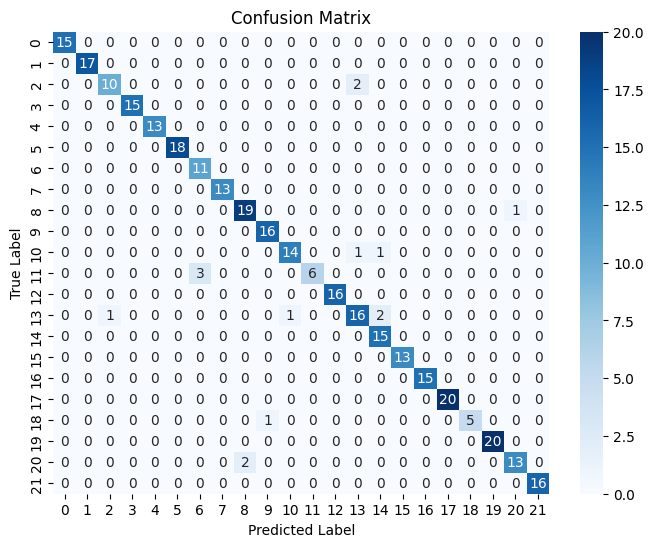

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(testY_classes, y_pred_classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,4.647850,0.380859,1.149645,0.650000
1,2,0.694746,0.781695,0.412924,0.887500
2,3,0.370972,0.871864,0.245978,0.937500
3,4,0.265575,0.915932,0.228611,0.934375
4,5,0.264072,0.911186,0.218982,0.918750


In [ ]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,accuracy,val_loss,val_accuracy
187,188,0.053519,0.974237,0.053552,0.978125


In [ ]:
print("Path to encoder.pkl:", os.path.join(checkpoint_dir, 'encoder.pkl'))


Path to encoder.pkl: ./checkpointt_1_ANN/encoder.pkl


In [ ]:
class_assignment = dict(zip(y, encoded_Y))

df_temp = pd.DataFrame([class_assignment], columns=class_assignment.keys())
df_temp = df_temp.stack()
df_temp = pd.DataFrame(df_temp).reset_index().drop(['level_0'], axis=1)
df_temp.columns = ['Category', 'Allocated Number']

df_temp.to_csv(checkpoint_no + '/' + 'class_assignment_df_' + model_name + '.csv')

print('Class assignment:')
class_assignment

Class assignment:


{'rice': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0.]),
 'maize': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'chickpea': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'kidneybeans': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'pigeonpeas': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0.]),
 'mothbeans': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'mungbean': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0.]),
 'blackgram': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'lentil': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
pk.dump(encoder, open(checkpoint_no + '/' + 'encoder.pkl', 'wb'))


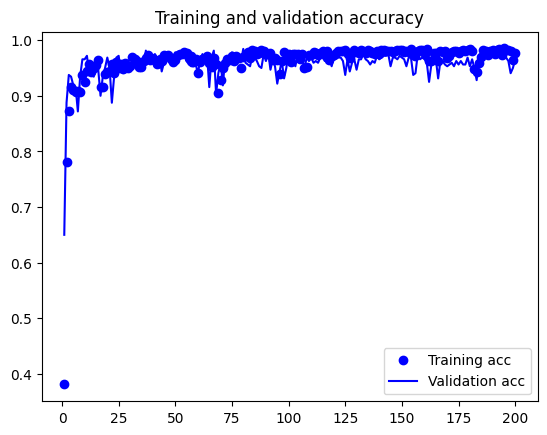

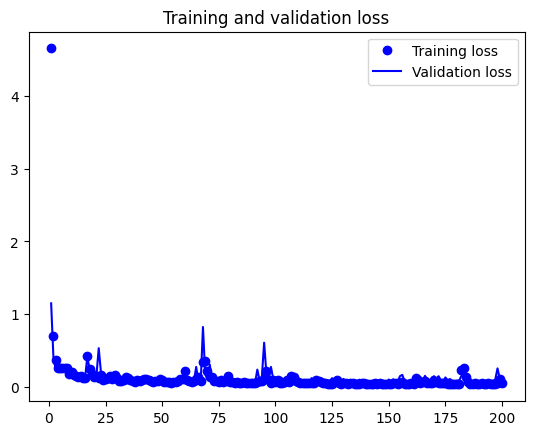

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print("Path to encoder.pkl:", os.path.join(checkpoint_dir, 'encoder.pkl'))


Path to encoder.pkl: ./checkpointt_1_ANN/encoder.pkl


In [ ]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Print the full path to encoder.pkl
encoder_path = os.path.join(".", "ckpt_1_ANN", "encoder.pkl")
print("Path to encoder.pkl:", encoder_path)

# Check if the file exists
if os.path.exists(encoder_path):
    print("The encoder.pkl file exists.")
else:
    print("The encoder.pkl file does not exist.")


Current Working Directory: /content
Path to encoder.pkl: ./ckpt_1_ANN/encoder.pkl
The encoder.pkl file does not exist.


In [ ]:
model_reloaded = load_model(checkpoint_no + '/' + model_name)

root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
best_model = load_model(model_name_temp)


In [ ]:
test_loss, test_acc = best_model.evaluate(testX,
                                          testY,
                                          steps=n_test_steps)
print()
print('Test Accuracy:', test_acc)

5/5 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9607

Test Accuracy: 0.9607250690460205


In [ ]:
y_pred = model.predict(testX)
y_pred[:5]

11/11 [==============================] - 0s 2ms/step


array([[1.16595733e-09, 8.91205444e-14, 3.22806136e-16, 1.38077649e-09,
        4.51693499e-14, 1.00083689e-12, 7.89604701e-11, 3.32996165e-11,
        1.76660061e-15, 9.99999702e-01, 2.27518674e-17, 7.90721265e-15,
        2.98283403e-12, 6.37924392e-12, 1.67326139e-10, 6.30502188e-15,
        3.53018023e-14, 6.97084756e-17, 2.03056857e-07, 4.77377181e-15,
        2.95766435e-15, 3.04918399e-18],
       [1.79384649e-11, 4.05385496e-14, 1.19564484e-16, 2.36649480e-12,
        9.99990523e-01, 3.50464049e-14, 1.44723365e-11, 1.33228184e-09,
        1.27929785e-11, 5.84965493e-14, 1.48473390e-14, 3.15169180e-12,
        4.30247376e-08, 4.93423492e-14, 2.93371869e-08, 4.23354419e-14,
        1.42255703e-06, 9.73852332e-10, 3.34397982e-10, 8.03263174e-06,
        1.68975402e-13, 2.84102481e-11],
       [6.24587934e-04, 8.57934647e-04, 6.70935214e-02, 1.99612492e-04,
        2.49625966e-02, 1.09471489e-06, 1.52918641e-04, 9.87719177e-05,
        5.71926939e-04, 4.54486008e-06, 1.17031738e-01

In [ ]:
encoder_reload = pk.load(open(checkpoint_dir + '//' + 'encoder.pkl','rb'))


In [ ]:
re_transformed_y_pred = encoder_reload.inverse_transform(y_pred)
re_transformed_y_pred[:10]


array([['kidneybeans'],
       ['coconut'],
       ['mungbean'],
       ['mothbeans'],
       ['rice'],
       ['muskmelon'],
       ['papaya'],
       ['orange'],
       ['watermelon'],
       ['papaya']], dtype=object)

In [ ]:
checkpoint_no_1 = 'ckpt_1_FNN'
model_name_1 = 'Crop_FNN'

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model_fnn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(trainX.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(df['label'].unique()), activation='softmax')
])

In [ ]:
model_fnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                512       
                                                                 
 dense_24 (Dense)            (None, 128)               8320      
                                                                 
 dense_25 (Dense)            (None, 22)                2838      
                                                                 
Total params: 11670 (45.59 KB)
Trainable params: 11670 (45.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.005)
model_fnn.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
checkpoint_dir_1= './'+ checkpoint_no_1
if not os.path.exists(checkpoint_dir_1):
    os.makedirs(checkpoint_dir_1)

In [ ]:
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir_1 + '/' + model_name_1,
                                   monitor='val_loss', save_best_only=True, mode='auto')]

In [ ]:
history_fnn = model_fnn.fit(trainX,trainY,epochs=200,batch_size=64,validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 14ms/step - loss: 9.4040 - accuracy: 0.1251 - val_loss: 2.0835 - val_accuracy: 0.4286
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 1.1829 - accuracy: 0.6117 - val_loss: 0.6181 - val_accuracy: 0.8214
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4615 - accuracy: 0.8432 - val_loss: 0.3606 - val_accuracy: 0.8864
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3319 - accuracy: 0.8968 - val_loss: 0.3541 - val_accuracy: 0.8961
Epoch 5/200
20/20 [==============================] - 0s 5ms/step - loss: 0.2779 - accuracy: 0.9123 - val_loss: 0.2542 - val_accuracy: 0.9221
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.9236 - val_loss: 0.2552 - val_accuracy: 0.9026
Epoch 7/200
20/20 [==============================] - 0s 6ms/step - loss: 0.2341 - accuracy: 0.9285 - val_loss: 0.2910 - val_accuracy: 0.9156
Epoch 8/200


In [ ]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import numpy as np
testX_numeric = testX.select_dtypes(include=np.number)
testX_np = testX_numeric.to_numpy()
test_loss, test_accuracy = model_fnn.evaluate(testX_np, testY)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


11/11 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9637
Test Loss: 0.11453902721405029
Test Accuracy: 0.9637462496757507


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Predict labels for the test data
predictions = model_fnn.predict(testX_np)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded testY back to class labels
true_classes = np.argmax(testY, axis=1)

# Calculate evaluation metrics
f1 = f1_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
precision = precision_score(true_classes, predicted_classes, average='weighted')
accuracy = accuracy_score(true_classes, predicted_classes)

# Print evaluation scores
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Accuracy Score:", accuracy)


11/11 [==============================] - 0s 2ms/step
F1 Score: 0.9637056636107745
Recall Score: 0.9637462235649547
Precision Score: 0.9652514122924644
Accuracy Score: 0.9637462235649547


In [ ]:
print(type(testX))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
hist_df_fnn = pd.DataFrame(history_fnn.history)
hist_df_fnn['epoch'] = hist_df_fnn.index + 1
cols = list(hist_df_fnn.columns)
cols = [cols[-1]] + cols[:-1]
hist_df_fnn = hist_df_fnn[cols]
hist_df.to_csv(checkpoint_no_1 + '/' + 'history_df_' + model_name_1+ '.csv')
hist_df_fnn.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,9.403996,0.125102,2.083530,0.428571
1,2,1.182867,0.611698,0.618105,0.821429
2,3,0.461494,0.843217,0.360588,0.886364
3,4,0.331938,0.896832,0.354126,0.896104
4,5,0.277876,0.912266,0.254154,0.922078


In [ ]:
best_values_fnn = hist_df_fnn[hist_df_fnn.val_loss == hist_df_fnn.val_loss.min()]
best_values_fnn

,epoch,loss,accuracy,val_loss,val_accuracy
116,117,0.054886,0.982128,0.121979,0.957792


In [ ]:
class_assignment_fnn = dict(zip(y, encoded_Y))

df_temp_fnn = pd.DataFrame([class_assignment_fnn], columns=class_assignment.keys())
df_temp_fnn= df_temp_fnn.stack()
df_temp_fnn = pd.DataFrame(df_temp_fnn).reset_index().drop(['level_0'], axis=1)
df_temp_fnn.columns = ['Category', 'Allocated Number']

df_temp_fnn.to_csv(checkpoint_no_1 + '/' + 'class_assignment_df_' + model_name_1 + '.csv')

print('Class assignment:')
class_assignment_fnn

Class assignment:


{'rice': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0.]),
 'maize': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'chickpea': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'kidneybeans': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'pigeonpeas': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0.]),
 'mothbeans': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'mungbean': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0.]),
 'blackgram': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'lentil': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
pk.dump(encoder, open(checkpoint_no_1 + '/' + 'encoder.pkl', 'wb'))


In [ ]:
import matplotlib.pyplot as plt

# Get the history of training
history_dict = history_fnn.history

# Extract accuracy and loss
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)


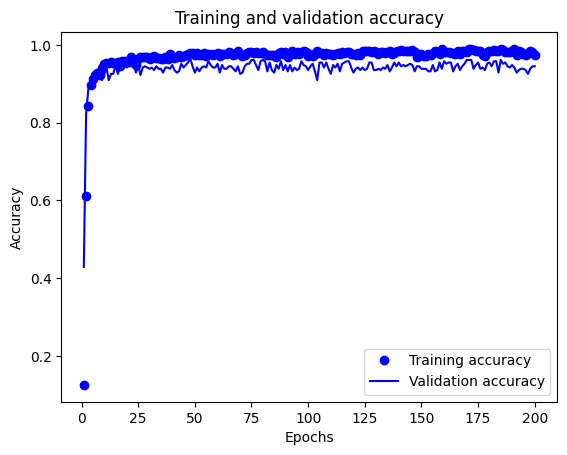

In [ ]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

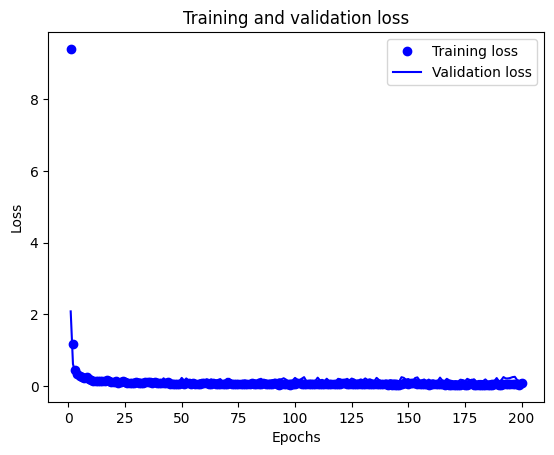

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
print("Path to encoder.pkl:", os.path.join(checkpoint_dir, 'encoder.pkl'))


Path to encoder.pkl: /content/checkpointt_1_ANN/encoder.pkl


In [ ]:
import os

print("Current Working Directory:", os.getcwd())

# Print the full path to encoder.pkl
encoder_path = os.path.join(".", "ckpt_1_FNN", "encoder.pkl")
print("Path to encoder.pkl:", encoder_path)

# Check if the file exists
if os.path.exists(encoder_path):
    print("The encoder.pkl file exists.")
else:
    print("The encoder.pkl file does not exist.")


Current Working Directory: /content
Path to encoder.pkl: ./ckpt_1_FNN/encoder.pkl
The encoder.pkl file exists.


In [ ]:
from keras.models import load_model

# Save the model as an HDF5 file
model.save('model.h5')

# To load the model:
model = load_model('model.h5')
model.save('./content/ckpt_1_FNN')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(trainX.shape[1], 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(df['label'].unique()), activation='softmax')
])


In [ ]:
model_rnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dense_27 (Dense)            (None, 22)                2838      
                                                                 
Total params: 15382 (60.09 KB)
Trainable params: 15382 (60.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.005)
model_rnn.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

history_rnn= model_rnn.fit(trainX,trainY,epochs=100,batch_size=25,validation_split=0.2)


Epoch 1/100
50/50 [==============================] - 2s 11ms/step - loss: 4.6985 - accuracy: 0.2071 - val_loss: 1.8628 - val_accuracy: 0.5390
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 1.1558 - accuracy: 0.6531 - val_loss: 0.9181 - val_accuracy: 0.6981
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.8099 - val_loss: 0.4741 - val_accuracy: 0.8279
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.3743 - accuracy: 0.8716 - val_loss: 0.4671 - val_accuracy: 0.8604
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3035 - accuracy: 0.8976 - val_loss: 0.3719 - val_accuracy: 0.8571
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.9236 - val_loss: 0.2721 - val_accuracy: 0.9156
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.9228 - val_loss: 0.2010 - val_accuracy: 0.9221
Epoch 8/100


In [ ]:
results = model_rnn.evaluate(testX_np, testY)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


11/11 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9335
Final test set loss: 0.181625
Final test set accuracy: 0.933535


In [ ]:
# Predict labels for the test data
predictions = model_rnn.predict(testX_np)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded testY back to class labels
true_classes = np.argmax(testY, axis=1)

# Calculate evaluation metrics
f1 = f1_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
precision = precision_score(true_classes, predicted_classes, average='weighted')
accuracy = accuracy_score(true_classes, predicted_classes)

# Print evaluation scores
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Accuracy Score:", accuracy)


11/11 [==============================] - 0s 3ms/step
F1 Score: 0.9324218721303975
Recall Score: 0.9335347432024169
Precision Score: 0.9443161541970854
Accuracy Score: 0.9335347432024169


In [ ]:
print(f"Type of testX: {type(testX)}")
print(f"Type of testY: {type(testY)}")


Type of testX: <class 'pandas.core.frame.DataFrame'>
Type of testY: <class 'numpy.ndarray'>


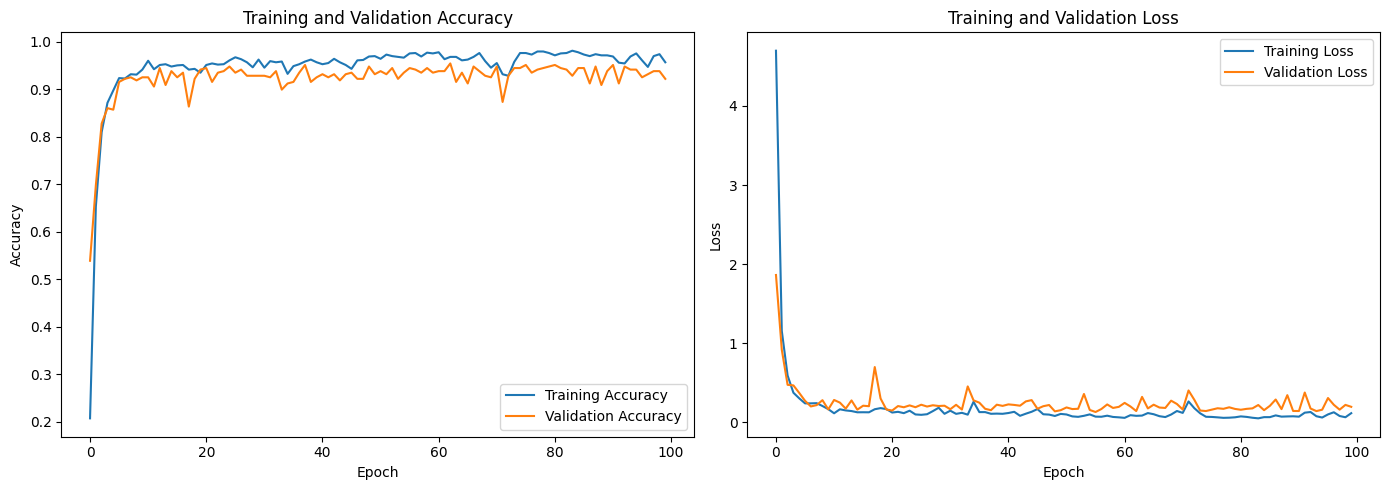

11/11 [==============================] - 0s 3ms/step - loss: 0.1816 - accuracy: 0.9335
Final test set loss: 0.181625
Final test set accuracy: 0.933535


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot training and validation accuracy
axes[0].plot(history_rnn.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss
axes[1].plot(history_rnn.history['loss'], label='Training Loss')
axes[1].plot(history_rnn.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
results = model_rnn.evaluate(testX, testY)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


In [ ]:
import tensorflow as tf

class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        query_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh(self.W1(query_with_time_axis) + self.W2(values)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights


In [ ]:
attention_units = 64  # Adjust the number of units as needed
attention_layer = BahdanauAttention(units=attention_units)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(trainX.shape[1], 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(df['label'].unique()), activation='softmax')
])

# Get the output of the last layer before the attention layer
query = model.layers[-1].output


In [ ]:
from tensorflow.keras.models import Model

context_vector, attention_weights = attention_layer(query, query)

model_with_attention = Model(inputs=model.input, outputs=[model.output, context_vector])
model_with_attention.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 simple_rnn_4_input (InputL  [(None, 7, 1)]               0         []                            
 ayer)                                                                                            
                                                                                                  
 simple_rnn_4 (SimpleRNN)    (None, 64)                   4224      ['simple_rnn_4_input[0][0]']  
                                                                                                  
 dense_31 (Dense)            (None, 128)                  8320      ['simple_rnn_4[0][0]']        
                                                                                                  
 dense_32 (Dense)            (None, 22)                   2838      ['dense_31[0][0]']      

In [ ]:
# Compile your model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.005)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
training_history= model.fit(trainX, trainY, epochs=100, batch_size=25, validation_split=0.2)


In [ ]:

import numpy as np
testX_numeric = testX.select_dtypes(include=np.number)
testX_np = testX_numeric.to_numpy()
test_loss, test_accuracy = model.evaluate(testX_np, testY)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



In [ ]:
# Predict labels for the test data
predictions = model.predict(testX_np)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded testY back to class labels
true_classes = np.argmax(testY, axis=1)

# Calculate evaluation metrics
f1 = f1_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
precision = precision_score(true_classes, predicted_classes, average='weighted')
accuracy = accuracy_score(true_classes, predicted_classes)

# Print evaluation scores
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Accuracy Score:", accuracy)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
print("Shape of testY:", testY.shape)
print("Shape of y_pred_classes:", y_pred_classes.shape)
print("Unique values in testY:", np.unique(testY))
print("Unique values in y_pred_classes:", np.unique(y_pred_classes))
print("Unique values in testY:", np.unique(testY))
print("Unique values in y_pred_classes:", np.unique(y_pred_classes))


In [ ]:
# Print the lengths of testY and y_pred_classes
print("Length of testY:", len(testY))
print("Length of y_pred_classes:", len(y_pred_classes))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
